#**Exploratory Data Analysis and Data Preparation**
### **NYC taxi trip summary in January 2021**

**Team 14**
**Members:**
* Srushti Khot
* Sudarshan Ramesh
* Sanket Revadigar
* Sharat Sindoor
* Nidhi Gowri Srinath 

In [35]:
# Importing the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [36]:
# Importing the data into a dataframe
data = pd.read_csv('/content/yellow_tripdata_2021-01.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


In [37]:
data.shape

(1369765, 18)

In [38]:
# Information regarding the table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369765 entries, 0 to 1369764
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1271413 non-null  float64
 1   tpep_pickup_datetime   1369765 non-null  object 
 2   tpep_dropoff_datetime  1369765 non-null  object 
 3   passenger_count        1271413 non-null  float64
 4   trip_distance          1369765 non-null  float64
 5   RatecodeID             1271413 non-null  float64
 6   store_and_fwd_flag     1271413 non-null  object 
 7   PULocationID           1369765 non-null  int64  
 8   DOLocationID           1369765 non-null  int64  
 9   payment_type           1271413 non-null  float64
 10  fare_amount            1369765 non-null  float64
 11  extra                  1369765 non-null  float64
 12  mta_tax                1369765 non-null  float64
 13  tip_amount             1369765 non-null  float64
 14  tolls_amount      

Analyzing the missing values of data for further insights

In [39]:
# Missing value analysis of data
missing = data.isnull().sum()/data.shape[0] * 100
missing

VendorID                 7.18021
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          7.18021
trip_distance            0.00000
RatecodeID               7.18021
store_and_fwd_flag       7.18021
PULocationID             0.00000
DOLocationID             0.00000
payment_type             7.18021
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.00000
dtype: float64

7% of the total data is missing. Further visualizing these missing values helps us determine what can be done to deal with them.

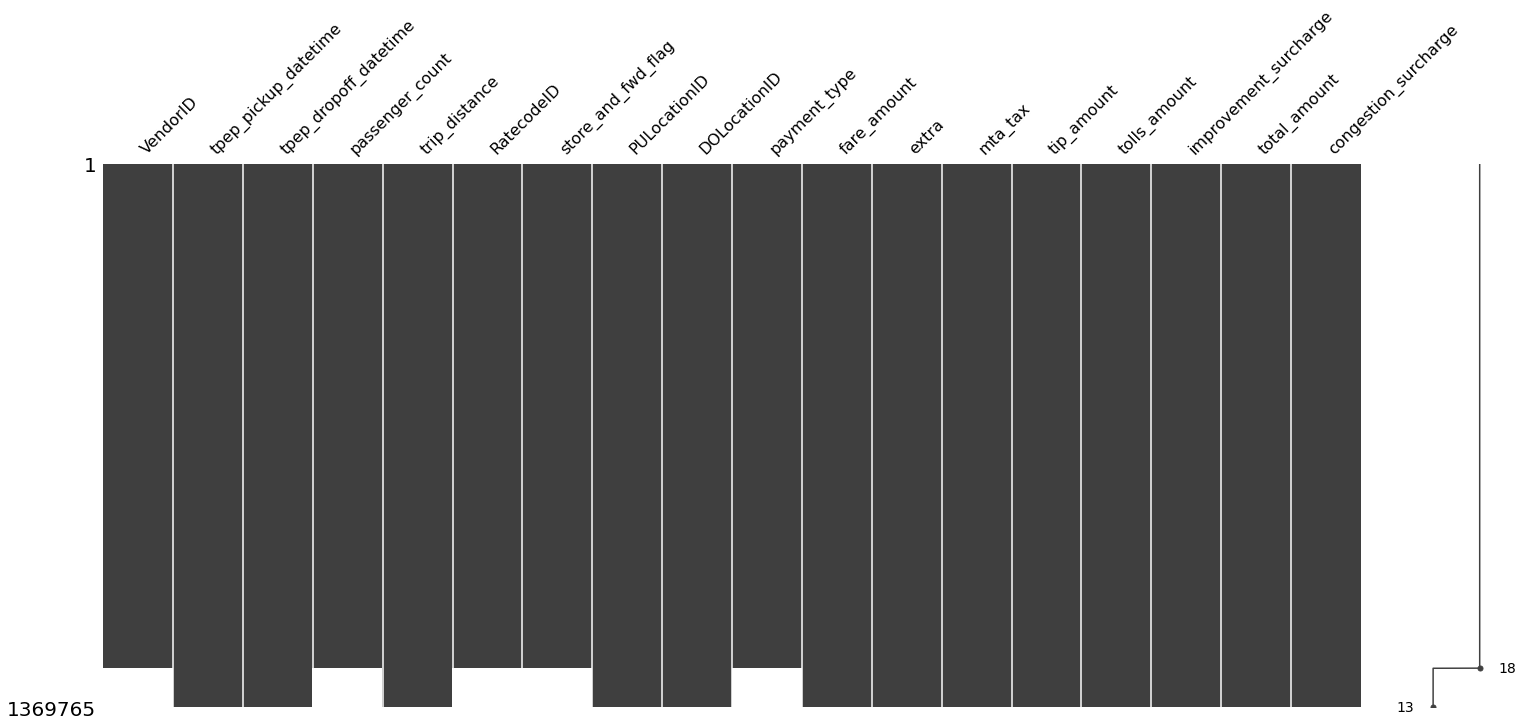

In [40]:
msno.matrix(data)

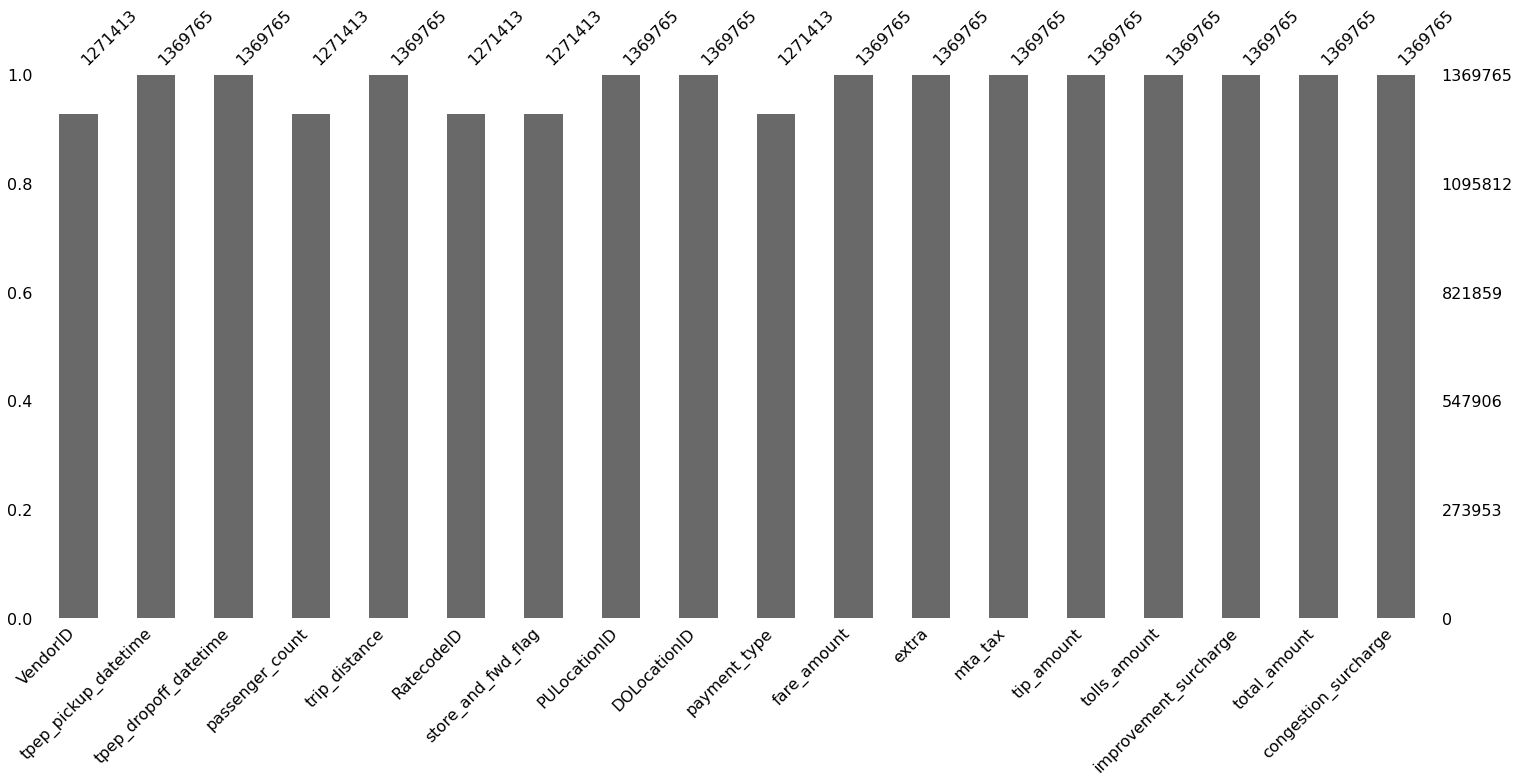

In [41]:
msno.bar(data)

Here, we see that the missing values lie in 5 columns. 
* Vendor ID
* Passenger Count
* Rate Code ID
* Store and Forward Flag
* Payment Type 

Some of these parameters can be ignored such as Vendor ID. But it is difficult to impute values based on aggregates or domain reference for these values. Since the percentage of missing data is just 7%, we are dropping the rows containing the missing values.

In [42]:
# Dropping the rows containing the missing information
data = data.dropna()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


In [43]:
# Looking at the new shape of the data
data.shape

(1271413, 18)

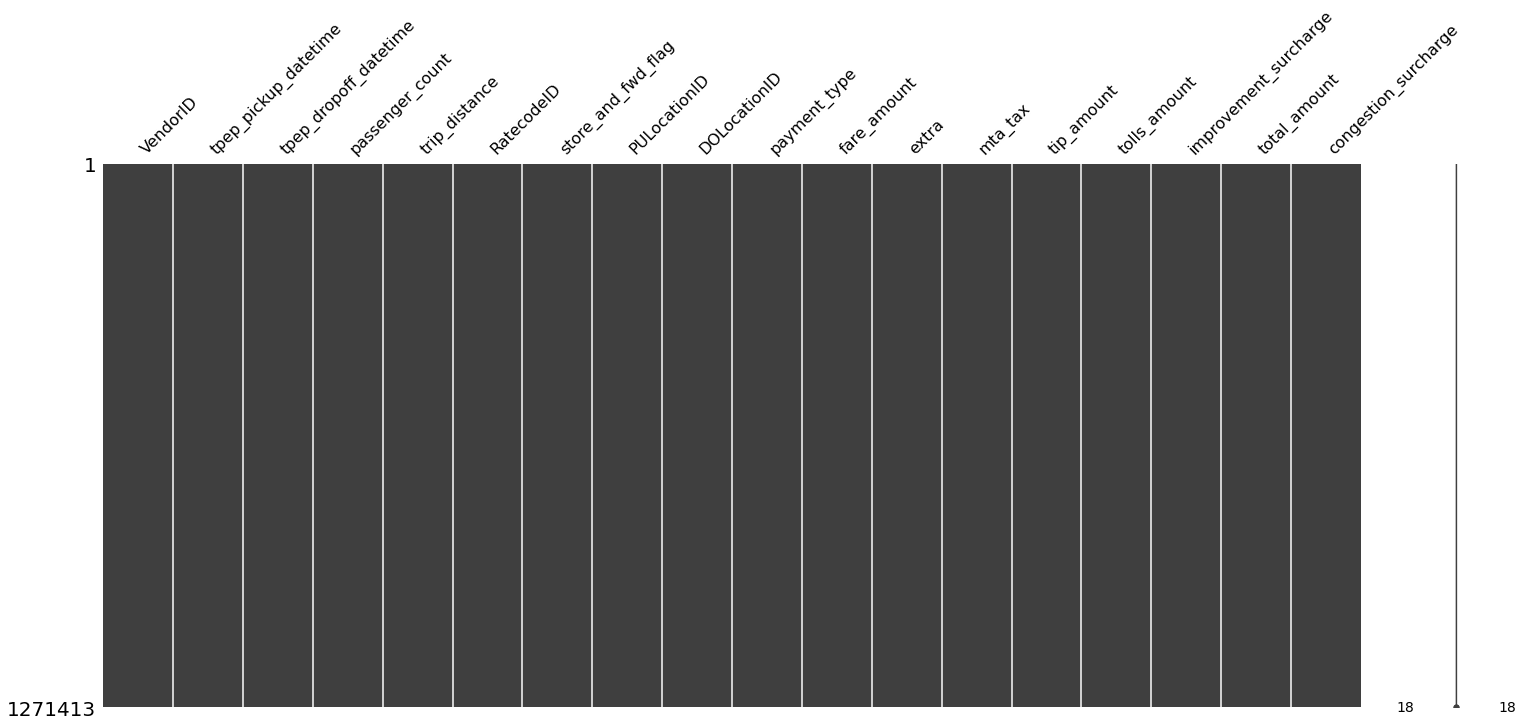

In [44]:
# Visualizing the present data 
msno.matrix(data)

Now, our data is completely filled and does not contain any missing values. 

In [45]:
# Understanding the quality of data and its statistical features
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06
mean,1.676925e+00,1.411508e+00,2.695507e+00,1.035081e+00,1.663164e+02,1.635025e+02,1.280521e+00,1.101425e+01,9.828323e-01,4.928536e-01,1.939242e+00,1.786589e-01,2.967077e-01,1.642607e+01,2.239046e+00
std,4.676513e-01,1.059833e+00,1.014488e+02,5.994840e-01,6.651732e+01,7.139416e+01,4.916921e-01,1.213470e+01,1.223763e+00,7.809472e-02,2.653374e+00,1.534606e+00,4.380522e-02,1.410729e+01,7.989446e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.056000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,2.790000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.500000e+00
max,2.000000e+00,8.000000e+00,1.143282e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,7.000000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00


Further, analyzing the correlation of data, we get:

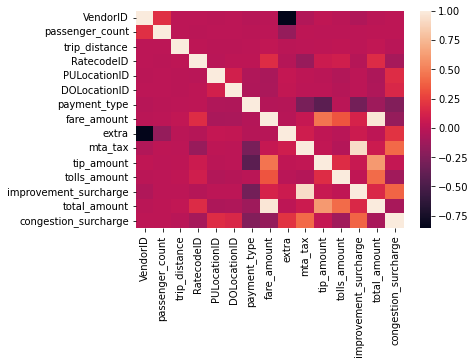

In [46]:
sns.heatmap(data.corr())

A major portion of the data seems to have no correlation with each other. Data with very high correlation needs to be analysed since the two correlated features can decrease the model performance efficiency.